In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [75]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [76]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [77]:
df.shape

(103, 7)

### Data Cleaning

In [80]:
#Removing unwanted "." and "," from the data

df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [81]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [84]:
#Removing Extra Space from column name
df.rename(columns = {"Production (Tons)":"Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)":"Acreage(Hectare)"}, inplace = True)
df.rename(columns = {"Yield(Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace = True)

In [85]:
df.sample(5)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
1,1,India,Asia,348448000,260721,4950000,70393.5
33,33,Costa Rica,North America,4158370,83111,6903,6024
27,27,Sudan,Africa,5525059,135428,69564,79424.5
38,38,Madagascar,Africa,3005641,114445,94157,31921.6
46,46,Côte d'Ivoire,Africa,1982661,79606,25205,78660.3


In [86]:
#Finding null values
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield (Kg / Hectare)         1
dtype: int64

In [87]:
df[df["Acreage(Hectare)"].isna()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [88]:
#Dropping the NaN columns as it is olny one and does not affect our analysis
df = df.dropna().reset_index()

In [89]:
#Removing Unwanted Columns
df.drop(["index","Unnamed: 0"], axis =1,inplace=True)

In [90]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [91]:
#Check Datatype
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield (Kg / Hectare)         object
dtype: object

In [92]:
#Changing the column data type from object to float for numeric columns to perform Analysis
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [93]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield (Kg / Hectare)         float64
dtype: object

In [94]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield (Kg / Hectare)         102
dtype: int64

### Univarate Analysis

In [95]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


#### How many countries produce sugercane from each continent?

In [96]:
df.groupby("Continent")["Country"].count()

Continent
Africa           38
Asia             25
Europe            2
North America    22
Oceania           4
South America    11
Name: Country, dtype: int64

In [97]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

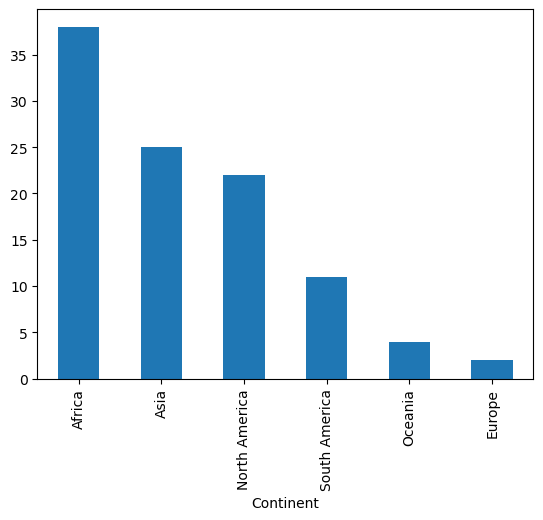

In [98]:
df["Continent"].value_counts().plot(kind="bar")

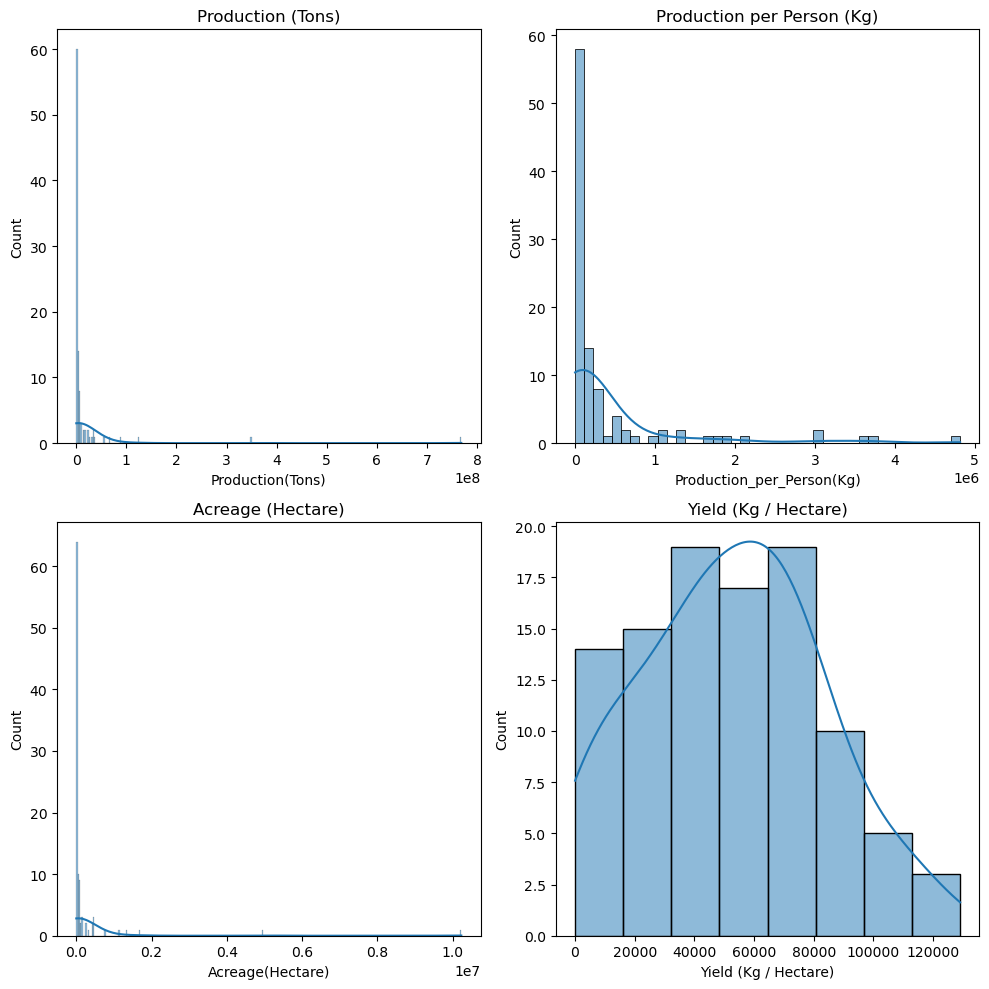

In [105]:
plt.figure(figsize=(10,10))

# 1st subplot
plt.subplot(2,2,1)                              #use to plot graphs just by changing last number we can provide quaters for each graph
sns.histplot(df["Production(Tons)"], kde=True)  # displot has been deprecated so now we are using histplot giving similler graph
plt.title("Production (Tons)")                  #.title gives us the title of the graph

# 2nd subplot
plt.subplot(2,2,2)
sns.histplot(df["Production_per_Person(Kg)"], kde=True)
plt.title("Production per Person (Kg)")

# 3rd subplot
plt.subplot(2,2,3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title("Acreage (Hectare)")

# 4th subplot
plt.subplot(2,2,4)
sns.histplot(df["Yield (Kg / Hectare)"], kde=True)
plt.title("Yield (Kg / Hectare)")

plt.tight_layout()
plt.show()

### Checking Outliers

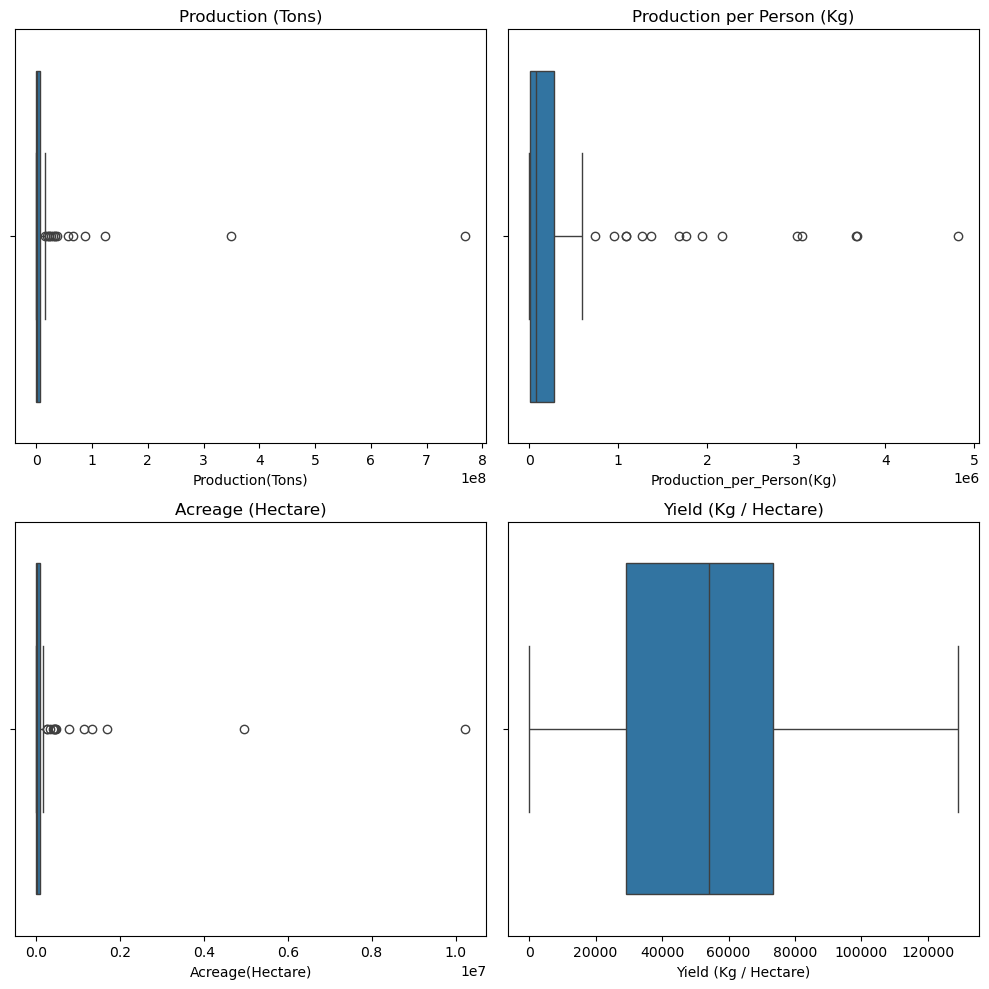

In [115]:
#NOTE:- No need tro remove the outliers(Reason Ex:- it will help to find out countries producing max and min production or data)
plt.figure(figsize=(10,10))

# 1st subplot
plt.subplot(2,2,1)
sns.boxplot(x=df["Production(Tons)"])
plt.title("Production (Tons)")

# 2nd subplot
plt.subplot(2,2,2)
sns.boxplot(x=df["Production_per_Person(Kg)"])
plt.title("Production per Person (Kg)")

# 3rd subplot
plt.subplot(2,2,3)
sns.boxplot(x=df["Acreage(Hectare)"])
plt.title("Acreage (Hectare)")

# 4th subplot
plt.subplot(2,2,4)
sns.boxplot(x=df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.tight_layout()
plt.show()

In [116]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000
mean,1.850372e+07,4.124805e+05,2.498981e+05,52628.078431
std,8.419149e+07,8.669140e+05,1.137003e+06,30504.676683
min,1.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,6.251875e+04,1.075225e+04,1.104000e+03,29072.025000
50%,1.440044e+06,8.135850e+04,1.655800e+04,54108.950000
75%,6.426824e+06,2.828128e+05,8.047400e+04,73282.700000
max,7.686784e+08,4.816299e+06,1.022620e+07,129049.300000


In [118]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
count,102.00,102.00,102.00,102.00
mean,"18,503,719.28","412,480.52","249,898.11","52,628.08"
std,"84,191,486.60","866,913.96","1,137,003.41","30,504.68"
min,1.00,0.00,0.00,10.00
25%,"62,518.75","10,752.25","1,104.00","29,072.03"
50%,"1,440,044.00","81,358.50","16,558.00","54,108.95"
75%,"6,426,823.75","282,812.75","80,474.00","73,282.70"
max,"768,678,382.00","4,816,299.00","10,226,205.00","129,049.30"


### Bivariate Analysis

In [119]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,"768,678,382.00","3,668,531.00","10,226,205.00","75,167.50"
1,India,Asia,"348,448,000.00","260,721.00","4,950,000.00","70,393.50"
2,China,Asia,"123,059,739.00","88,287.00","1,675,215.00","73,459.10"
3,Thailand,Asia,"87,468,496.00","1,264,303.00","1,336,575.00","65,442.20"
4,Pakistan,Asia,"65,450,704.00","324,219.00","1,130,820.00","57,879.00"


#### Which country produces maximum sugercane?

In [121]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [122]:
df_new

,Production(Tons)
Country,
Brazil,"768,678,382.00"
India,"348,448,000.00"
China,"123,059,739.00"
Thailand,"87,468,496.00"
Pakistan,"65,450,704.00"
...,...
Spain,394.00
Lebanon,97.00
Singapore,50.00


In [123]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [124]:
df_new.head()

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,"768,678,382.00",40.73
India,"348,448,000.00",18.46
China,"123,059,739.00",6.52
Thailand,"87,468,496.00",4.63
Pakistan,"65,450,704.00",3.47


<Axes: ylabel='Production(Tons)_percent'>

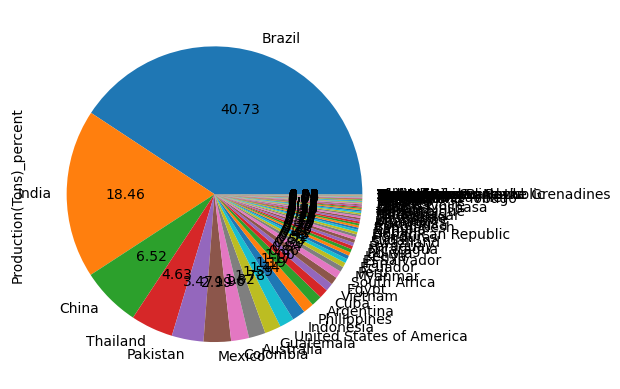

In [125]:
df_new["Production(Tons)_percent"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

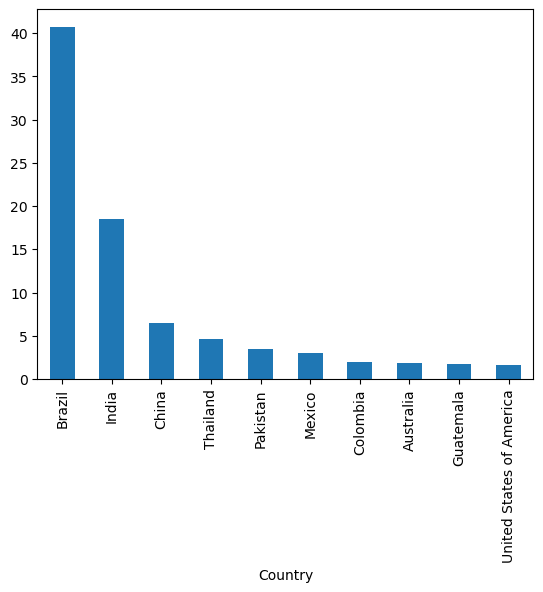

In [128]:
df_new["Production(Tons)_percent"].head(10).plot(kind="bar")

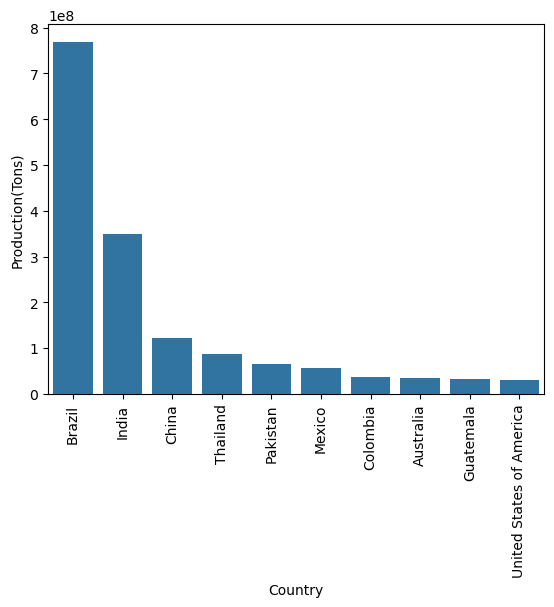

In [155]:
df_acr = df.sort_values("Production(Tons)",ascending = False)
ax = sns.barplot(data = df.head(10), x = "Country", y = "Production(Tons)")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(rotation=90)
plt.show()

#### Which Country has highest land?

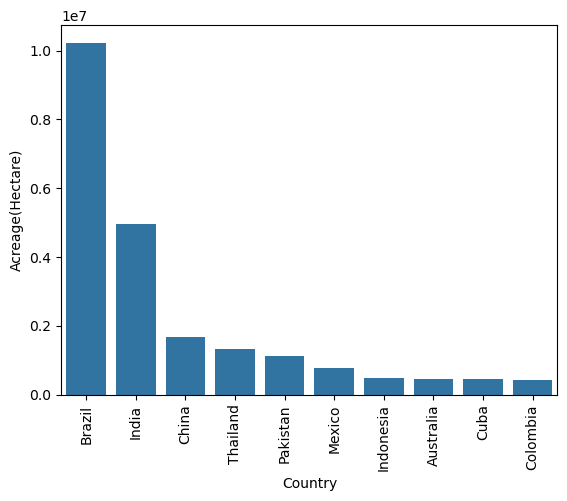

In [154]:
df_acr = df.sort_values("Acreage(Hectare)",ascending = False)
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage(Hectare)")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(rotation=90)
plt.show()

#### Which country has highest yield per hectare?

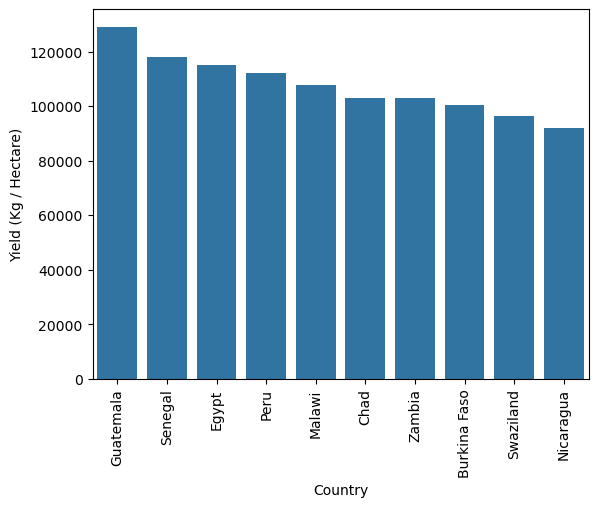

In [153]:
df_yield = df.sort_values("Yield (Kg / Hectare)",ascending = False)
ax = sns.barplot(data = df_yield.head(10), x = "Country", y = "Yield (Kg / Hectare)")
plt.xticks(rotation=90) 
plt.show()

#### Which Country has highest Production_per_Person(Kg)?

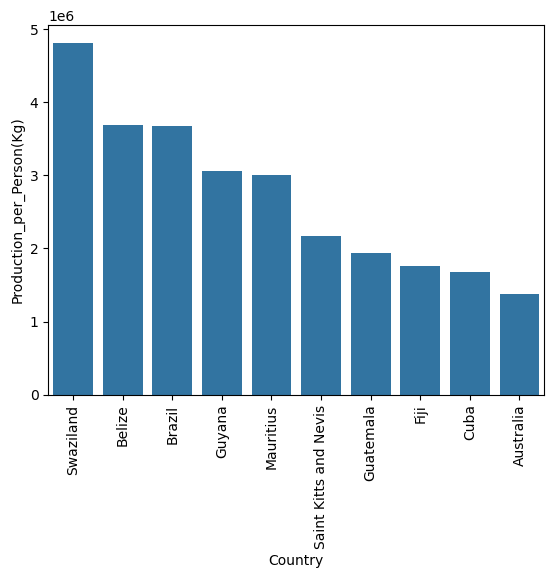

In [159]:
df_prod = df.sort_values("Production_per_Person(Kg)",ascending=False)
ax = sns.barplot(data = df_prod.head(10),x="Country", y = "Production_per_Person(Kg)")
plt.xticks(rotation=90)
plt.show()

### Correlation

In [161]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Production(Tons),1.00,0.35,1.00,0.13
Production_per_Person(Kg),0.35,1.00,0.34,0.22
Acreage(Hectare),1.00,0.34,1.00,0.11
Yield (Kg / Hectare),0.13,0.22,0.11,1.00


<Axes: >

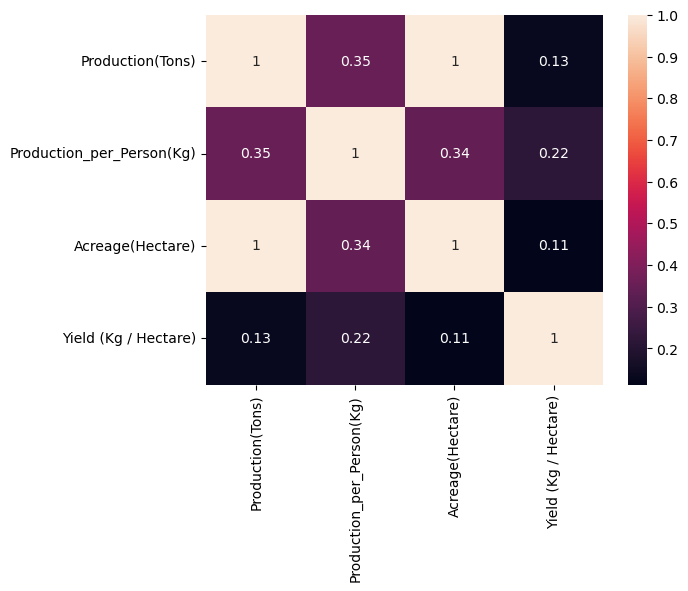

In [169]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

#### Do countries with highest land produce more sugercane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

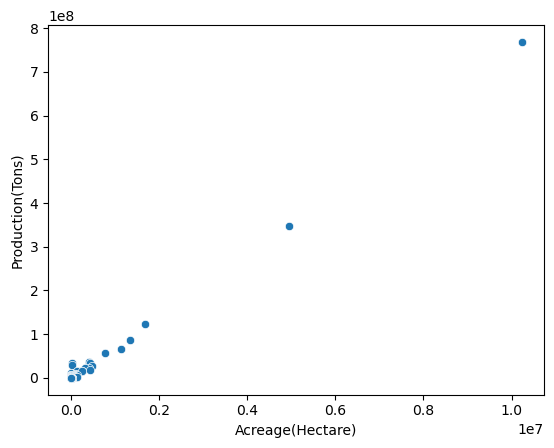

In [171]:
sns.scatterplot(data = df, x="Acreage(Hectare)",y="Production(Tons)")

#### Do countries which yield more sugercane per hectare produces more sugercane in total?

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production(Tons)'>

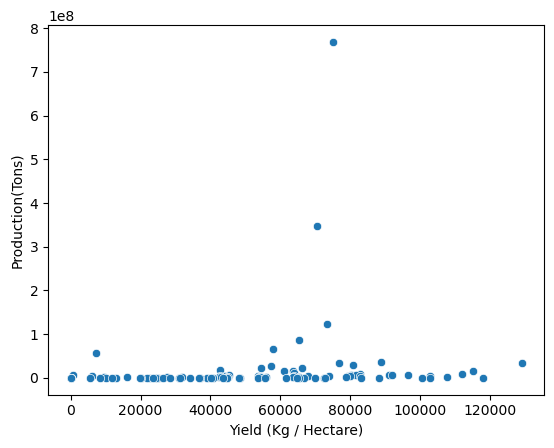

In [172]:
sns.scatterplot(data = df, x="Yield (Kg / Hectare)",y="Production(Tons)")

### Analysis for Continent

In [173]:
df_continent = df.groupby("Continent").sum()

In [174]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,"89,681,472.00","10,144,110.00","1,439,089.00","2,142,107.50"
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,"721,930,425.00","3,120,808.00","10,608,319.00","1,171,871.40"
Europe,PortugalSpain,"5,823.00",536.00,71.00,"131,870.90"
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,"173,995,947.00","15,420,953.00","1,581,983.00","1,082,602.40"
Oceania,AustraliaFijiPapua New GuineaSamoa,"36,177,574.00","3,158,066.00","490,909.00","162,419.10"
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,"865,588,126.00","10,228,540.00","11,369,236.00","677,192.70"


#### Which Continent produces maximum sugercane?

In [176]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

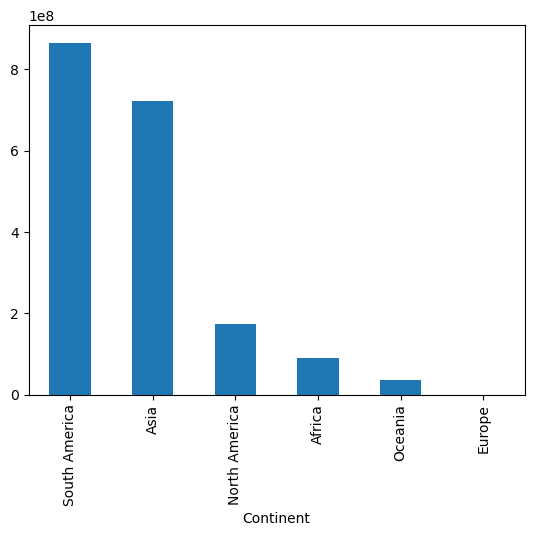

In [175]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind="bar")

<Axes: xlabel='Continent'>

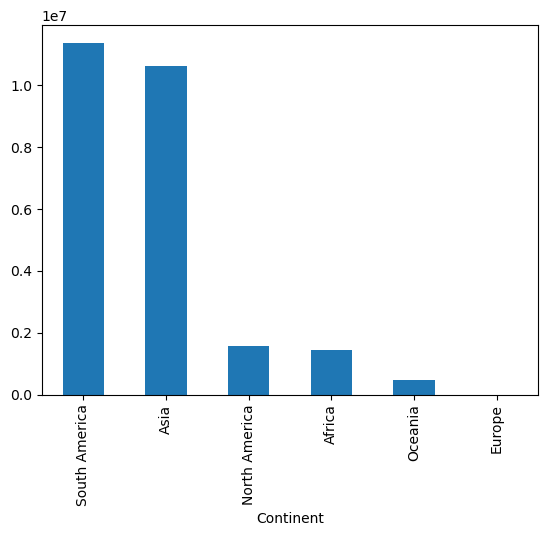

In [177]:
df_continent["Acreage(Hectare)"].sort_values(ascending = False).plot(kind="bar")

#### Do number of countries in a continent effacys production of sugarcane?

In [181]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [182]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,"89,681,472.00","10,144,110.00","1,439,089.00","2,142,107.50",38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,"721,930,425.00","3,120,808.00","10,608,319.00","1,171,871.40",25
Europe,PortugalSpain,"5,823.00",536.00,71.00,"131,870.90",2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,"173,995,947.00","15,420,953.00","1,581,983.00","1,082,602.40",22
Oceania,AustraliaFijiPapua New GuineaSamoa,"36,177,574.00","3,158,066.00","490,909.00","162,419.10",4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,"865,588,126.00","10,228,540.00","11,369,236.00","677,192.70",11


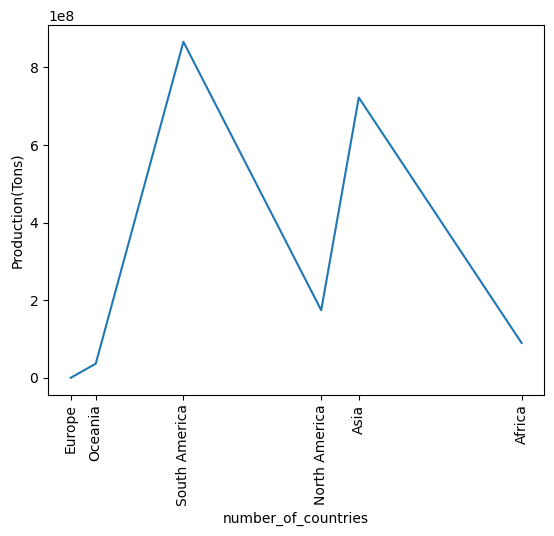

In [186]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x="number_of_countries",y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"],continent_names,rotation=90)
plt.show()

#### Production distribution by continent

<Axes: ylabel='Production(Tons)'>

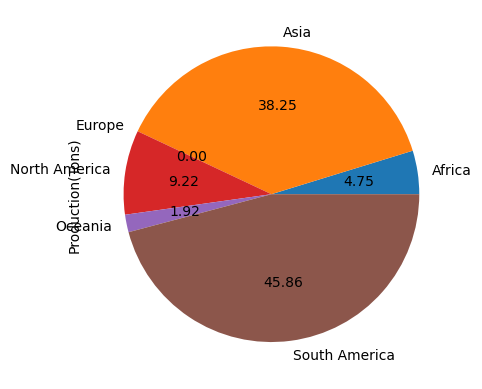

In [189]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

#### Correlation for continent

In [187]:
df_continent.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),number_of_countries
Production(Tons),1.00,0.14,0.99,0.09,0.11
Production_per_Person(Kg),0.14,1.00,0.07,0.54,0.53
Acreage(Hectare),0.99,0.07,1.00,0.11,0.13
Yield (Kg / Hectare),0.09,0.54,0.11,1.00,0.99
number_of_countries,0.11,0.53,0.13,0.99,1.00
